In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay


In [2]:
# Load the digits dataset
digits = load_digits()
X, y = digits.data, digits.target


In [3]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)


In [4]:
# Train the model
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)


In [5]:
# Evaluate the model using cross-validation
cv_scores = cross_val_score(knn, X, y, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {np.mean(cv_scores):.2f}")


Cross-validation scores: [0.94722222 0.95555556 0.96657382 0.98050139 0.9637883 ]
Mean cross-validation score: 0.96


In [6]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[54  0  0  0  0  0  0  0  0  0]
 [ 0 55  0  0  0  0  0  0  0  0]
 [ 0  0 53  0  0  0  0  0  0  0]
 [ 0  0  0 55  0  0  0  0  0  0]
 [ 0  0  0  0 54  0  0  0  0  0]
 [ 0  0  0  0  0 54  0  0  0  1]
 [ 0  0  0  0  0  0 54  0  0  0]
 [ 0  0  0  0  0  0  0 54  0  0]
 [ 0  2  0  1  0  0  0  1 48  0]
 [ 0  0  0  0  1  0  0  0  1 52]]


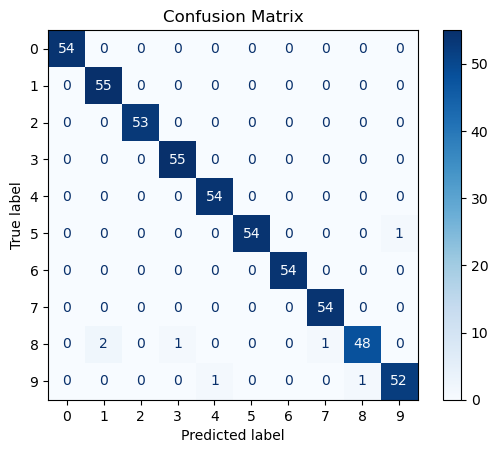

In [8]:
# Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=digits.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


In [9]:
# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       0.96      1.00      0.98        55
           2       1.00      1.00      1.00        53
           3       0.98      1.00      0.99        55
           4       0.98      1.00      0.99        54
           5       1.00      0.98      0.99        55
           6       1.00      1.00      1.00        54
           7       0.98      1.00      0.99        54
           8       0.98      0.92      0.95        52
           9       0.98      0.96      0.97        54

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540



In [10]:
# Experiment with different K values
k_values = range(1, 21)
scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))


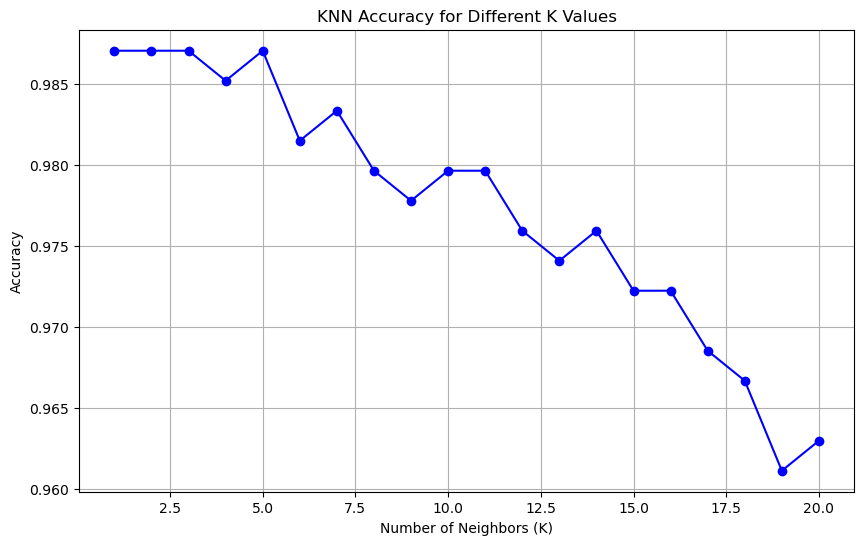

In [11]:
# Plot accuracy vs. K values
plt.figure(figsize=(10, 6))
plt.plot(k_values, scores, marker='o', color='b')
plt.title('KNN Accuracy for Different K Values')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.grid()
plt.show()
